In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline


from pylab import rcParams
rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
rcParams['image.interpolation'] = 'nearest'
rcParams['image.cmap'] = 'jet'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import sys
sys.path.append('../')
from Model import Model, Optimizer
import numpy as np
import matplotlib.pyplot as plt

In [99]:
def Target(x):
    #The function we're trying to fit
    scale = 2*np.pi/10
    return np.sin(scale*x)

In [100]:
epochs = 100
train_interval = 2
updates = 200

model = Model(dt=0.01)
single_neuron = []

for epoch in range(epochs):
    for update in range(updates):
        
        for step in range(train_interval):
            model.step()
            single_neuron.append(model.x[0])
            
        target = Target(model.t)
            
            

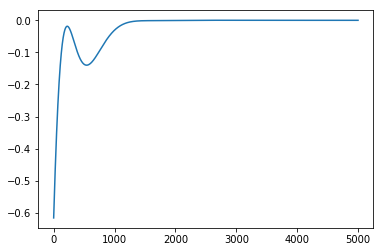

In [67]:
plt.plot(single_neuron[:5000])


Nice smooth dynamics - GM

In [123]:
epochs = 300
train_interval = 2
updates = 200

opt = Optimizer()
model = Model(num_neurons=1000,dt=0.01)
rs = []
z = []
etas = []

for epoch in range(epochs):
    for update in range(updates):
        
        for step in range(train_interval):
            model.step()
            rs.append(model.r)
            z.append(model.z)
            
        target = Target(model.t)
        model.w_out, error = opt.update(model.w_out,model.r,target)
        etas.append(opt.eta)
        
            
            

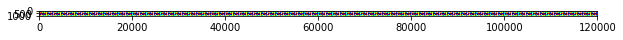

In [124]:
plt.imshow(np.asarray(rs).T)

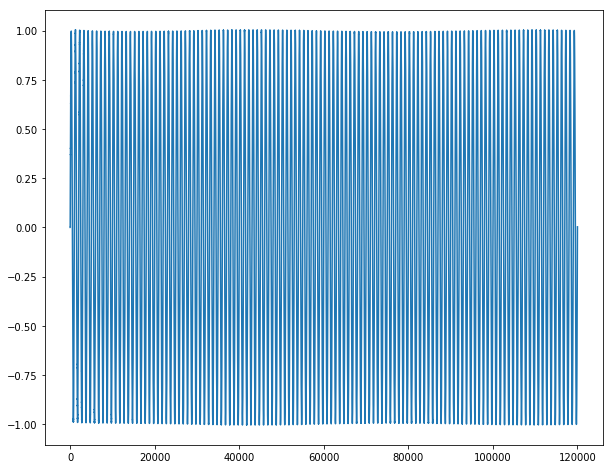

In [125]:
plt.plot(z)

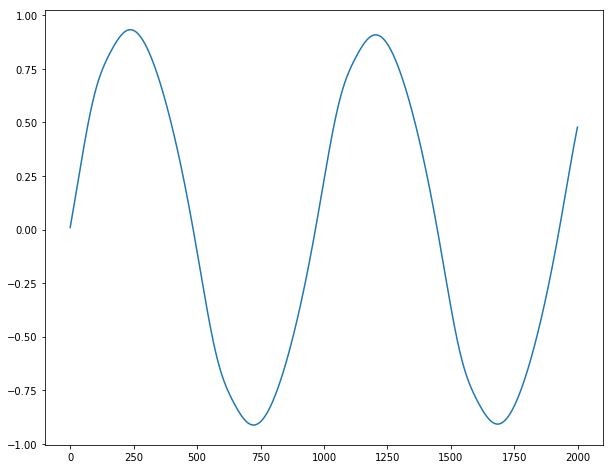

In [126]:
cross_val_z = []
steps = 2000
for i in range(steps):
    model.step()
    cross_val_z.append(model.z)
    
plt.plot(cross_val_z)

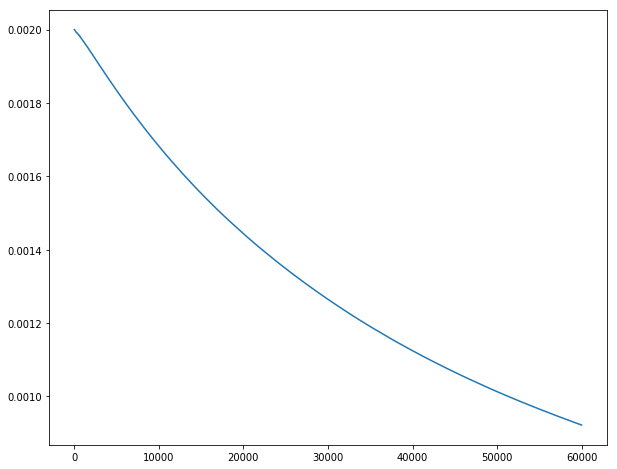

In [127]:
plt.plot(etas)